## Data Story

    League of Legends Competitive eSports
    by Varun Nadgir

### Introduction

The dataset I am exploring for this project is the League of Legends competitive match data, made available thanks to [Oracle's Elixir](http://oracleselixir.com/match-data/). At its core, League of Legends (or "LoL") is a 5v5 strategy game where the goal is to destroy the opponent's most important structure (the "Nexus"). To do this, players engage in a drafting phase before the game where they choose characters (known as "Champions") to ban away from the opposing team and to pick for themselves. Depending on the types of Champions picked, one can get a sense of the type of strategy the team is going for. As the competitive scene has developed over the years, teams have hired coaches and analysts to study tendencies and figure out the optimal strategies for winning the game. For my project, I would like to put myself in the shoes of an analyst and see what I can learn for myself.

### The Dataset

Riot Games, the company behind League of Legends, frequently patches their game to change existing characters, items, objectives, or to add new ones. This means the competitive landscape is always changing, and some data from 2016 may not be relevant today. Since Oracle's Elixir has separated their data by year, we will be looking at just this past 2018 Spring split match data. This dataset will include data from all major regions/leagues and some minor ones. 

### Game Time by Region

To begin with, I'd like to compare each region's average game time. This will give a sense of how aggressive or passive a region's playstyle is - quicker games generally mean teams apply pressure from the get-go and end games quickly, and longer games are usually slower, more calculated games. In some cases, slower games can also mean lower quality games due to neither team understanding how to use their leads to finish a game. Based on talks between professional analysts, the Chinese region (the "LPL") is typically considered the most aggressive, so I would expect them to have the fastest game time as well.

C:\Users\FKBOX\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


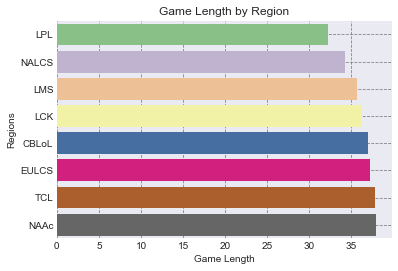

In [62]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv

# read in csv
loldf = pd.read_csv('loldata.csv')

# plot the game length by the region
group = 'league'
var = 'gamelength'

regions = loldf['league'].unique()

group_mean = loldf.groupby(group)[var].mean()

region_times = pd.DataFrame([regions, group_mean], ('regions', 'gametime'))
region_times = region_times.transpose()
region_times = region_times.sort_values('gametime')

sns.set_style('darkgrid')
sns.barplot(x='gametime', y='regions', data=region_times, orient='h', palette='Accent')
plt.title('Game Length by Region')
plt.xlabel('Game Length')
plt.ylabel('Regions')
plt.grid(linestyle='dashed', color='grey')

 As we can see, our intuition is correct and the LPL is the fastest region with a 33 minute average game time. We can also see that the longest game times belong to NAAc and TCL, which are the North American Academy League (essentially the B-teams of the main North American organizations) and the Russian league respectively. These Leagues are slightly less developed, so it would make sense that their games go a bit longer.

### Champion Performance by Player

Next, I would like to look at which players have the most success on a particular champion. Although there are lots of statistics to compare, the simplest one would be the winrate. 

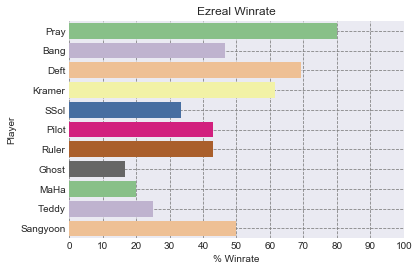

In [71]:
# -- CHAMPION PERFORMANCE ANALYSIS -- #
# columns to use for champion performance analysis
player_champions = ['gameid', 'league', 'patchno', 'playerid', 'side', 'position', 'player', 'team', 'champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'gamelength', 'result']

pc = loldf[player_champions]

LCK_players = pc[pc['league']=='LCK']

# get # games and # wins to calculate winrate for a champion
# replace LCK_players with NA or EU dataframe to get other results
LCK_games = LCK_players.groupby(['player', 'position', 'champion'])['champion'].count()
LCK_wins = LCK_players.groupby(['player', 'position', 'champion'])['result'].sum()

# create empty DF
LCK_performance = pd.DataFrame(columns=['wins', 'games', 'winrate'])

# enter games and winrate
LCK_performance['wins'] = LCK_wins
LCK_performance['games'] = LCK_games
LCK_performance['winrate'] = (LCK_wins/LCK_games)*100

# reset index so that players and champions become row values again
# remove the team entry
LCK_performance = LCK_performance.reset_index()
LCK_performance = LCK_performance[LCK_performance.player != 'Team']

# save a dataframe for each position
LCK_performance_top = LCK_performance[LCK_performance['position']=='Top']
LCK_performance_jng = LCK_performance[LCK_performance['position']=='Jungle']
LCK_performance_mid = LCK_performance[LCK_performance['position']=='Middle']
LCK_performance_adc = LCK_performance[LCK_performance['position']=='ADC']
LCK_performance_sup = LCK_performance[LCK_performance['position']=='Support']

# sort champion alphabetically, sort winrate descending
LCK_performance.sort_values(['champion', 'winrate'], ascending=[True, False])

# plot winrates for submitted position and champion 
pos = 'ADC'
champ = 'Ezreal'

plotdata = (LCK_performance['position']==pos)&(LCK_performance['champion']==champ)

sorted_games = LCK_performance[plotdata].sort_values(['games', 'wins'], ascending=False)

sns.set_style('darkgrid')
sns.barplot(x='winrate', y='player', data=sorted_games, orient='h', palette='Accent')
plt.title(champ+' Winrate')
plt.xlabel('% Winrate')
plt.ylabel('Player')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(linestyle='dashed', color='grey')


# sorted_games.plot('player', 'winrate', kind='barh', title=champ+' Winrate', legend=False, grid=True)

Not only does the plot indicate the winrate of each players' performance on the Champion "Ezreal", it is also sorted by the number of games played on that Champion, then the number of wins. What this shows is that Pray is the best performer on this Champion - not only does he boast an 80% winrate, he also has played the most games (shared with Bang).

In [69]:
sorted_games

,player,position,champion,wins,games,winrate
375,Pray,ADC,Ezreal,12,15,80.000000
27,Bang,ADC,Ezreal,7,15,46.666667
128,Deft,ADC,Ezreal,9,13,69.230769
260,Kramer,ADC,Ezreal,8,13,61.538462
416,SSol,ADC,Ezreal,4,12,33.333333
368,Pilot,ADC,Ezreal,3,7,42.857143
407,Ruler,ADC,Ezreal,3,7,42.857143
170,Ghost,ADC,Ezreal,1,6,16.666667
308,MaHa,ADC,Ezreal,1,5,20.000000
497,Teddy,ADC,Ezreal,1,4,25.000000
